# Tempo

## Cell 1 - Imports

In [1]:
import librosa
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Cell 2 - Grab Files

In [2]:
DATASET_PATH = "Data/genres_original"
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
file_paths = []
genre_count = []

# Iterate through each genre and load the audio files
for genre in genres:
    genre_path = os.path.join(DATASET_PATH, genre)
    if os.path.isdir(genre_path):
        for file in os.listdir(genre_path):
            if file.endswith(".wav"):
                file_path = os.path.join(genre_path, file)
                try:
                    # Add file path to the list
                    file_paths.append(file_path)
                    # Assign label based on genre index
                    genre_count.append(genres.index(genre))
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
                    continue

# Print the number of loaded files and labels
print("Files loaded:", len(file_paths))
print("Labels loaded:", len(genre_count))
print("Genres loaded:", len(genres))

genre_count[400], file_paths[400]

Files loaded: 1000
Labels loaded: 1000
Genres loaded: 10


(4, 'Data/genres_original\\hiphop\\hiphop.00000.wav')

## Cell 3 - Tempo Extraction

In [3]:
features = [] # Storing feature vectors.

for i, file in enumerate(file_paths):
    try:
        # Load audio file.
        y, sr = librosa.load(file, sr=None)
        
        #Extract tempo.
        tempo,__ = librosa.beat.beat_track(y=y, sr=sr)
        
        #Add tempo as feature.
        features.append([tempo, genre_count[i]])
        
        if i % 50 == 0:
            print(f"Processed {i} files...")
            
    except Exception as e:
        print(f"Processing Error {file}: {e}")
        continue
    
df = pd.DataFrame(features, columns=['tempo', 'genre'])
print(df.head())

Processed 0 files...
Processed 50 files...
Processed 100 files...
Processed 150 files...
Processed 200 files...
Processed 250 files...
Processed 300 files...
Processed 350 files...
Processed 400 files...
Processed 450 files...
Processed 500 files...
Processed 550 files...
Processed 600 files...
Processed 650 files...
Processed 700 files...
Processed 750 files...
Processed 800 files...
Processed 850 files...
Processed 900 files...
Processed 950 files...
                  tempo  genre
0          [123.046875]      0
1   [67.99958881578948]      0
2      [161.4990234375]      0
3   [63.02400914634146]      0
4  [135.99917763157896]      0


# Cell 4 - Model Training

In [4]:
X = df[['tempo']]
y= df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
                             
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))                           

Accuracy: 0.175


# Cell 5 - Data Processing and Model Training

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.175


# Cell 6 - Cross Validation

In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.18 0.15 0.19 0.18 0.15]
Mean accuracy: 0.16999999999999998


# Cell 7 - Model Evaluation

Matplotlib is building the font cache; this may take a moment.
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


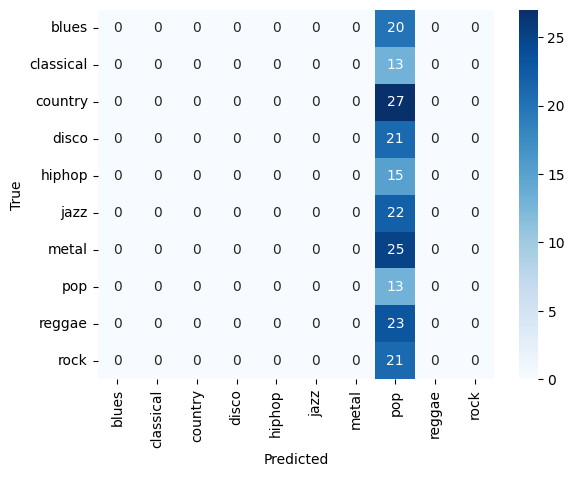

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        20
   classical       0.00      0.00      0.00        13
     country       0.00      0.00      0.00        27
       disco       0.00      0.00      0.00        21
      hiphop       0.00      0.00      0.00        15
        jazz       0.00      0.00      0.00        22
       metal       0.00      0.00      0.00        25
         pop       0.07      1.00      0.12        13
      reggae       0.00      0.00      0.00        23
        rock       0.00      0.00      0.00        21

    accuracy                           0.07       200
   macro avg       0.01      0.10      0.01       200
weighted avg       0.00      0.07      0.01       200



c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

['tempo_model.joblib']

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=genres, yticklabels=genres)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, y_pred, target_names=genres))

joblib.dump(clf, 'tempo_model.joblib')

# Cell 8 - Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.11000000000000001
Accuracy: 0.065
